### import

In [1]:
import json
from chainer import serializers, datasets
from nets import AutoEncoder
import matplotlib.pyplot as plt

### load datasets & model

In [3]:
_, test = datasets.get_mnist(withlabel=False, ndim=1)
params = json.load(open("result/autoencoder-mnist/model_structure.json", "r"))
auto_encoder= AutoEncoder(**params)
serializers.load_npz("result/autoencoder-mnist/model_weights.npz", auto_encoder)

### encode & decode

In [4]:
results = auto_encoder(test[0:10])

### draw results

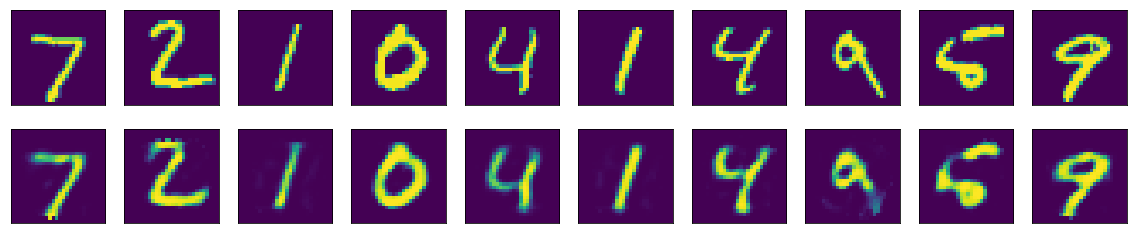

In [5]:
nplot = 10
figs = plt.figure(figsize=(20, 4))

for n in range(nplot):
    ax = figs.add_subplot(2, nplot, n+1)
    ax.imshow(test[n].reshape((28,28)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    ax = figs.add_subplot(2, nplot, nplot+n+1)
    result = results[n].array.reshape((28,28))
    ax.imshow(result)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()